In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 25.9 MB/s eta 0:00:00


In [ ]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data sci AI Resecrh/Prototype Cutting Optimize Vcst  Rev.02.xlsx')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,เหล็กกล่อง T3.2 X 38 X 38 X6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Work1,Work2,Work3,Work4,Work5,NaN,NaN,NaN
2,NaN,NaN,NaN,Length part (+5),1428,1228,1725,275,1045,Length STD.,6000,NaN
3,NaN,NaN,NaN,QTY,6,6,4,2,3,Length MIN,Lose Total,Steel Toal
4,NaN,NaN,NaN,Length part,1423,1223,1720,270,1040,275,0,0
5,NaN,NaN,NaN,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
6,NaN,NaN,NaN,1,4,0,0,1,0,5987,13,0
7,NaN,NaN,NaN,2,3,1,0,1,0,5787,213,0
8,NaN,NaN,NaN,3,3,0,0,2,1,5879,121,0
9,NaN,NaN,NaN,4,2,2,0,2,0,5862,138,0


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data sci AI Resecrh/Prototype Cutting Optimize Vcst  Rev.02.xlsx', sheet_name = 'เหล็กกล่อง T3.2 X 38 X 38 X6000' , header = 2 ,usecols = 'd:l')
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Length part (+5),1428,1228.0,1725.0,275.0,1045.0,Length STD.,6000,NaN
1,QTY,6,6.0,4.0,2.0,3.0,Length MIN,Lose Total,Steel Toal
2,Length part,1423,1223.0,1720.0,270.0,1040.0,275,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,4,0.0,0.0,1.0,0.0,5987,13,0
5,2,3,1.0,0.0,1.0,0.0,5787,213,0
6,3,3,0.0,0.0,2.0,1.0,5879,121,0
7,4,2,2.0,0.0,2.0,0.0,5862,138,0
8,5,2,0.0,1.0,1.0,1.0,5901,99,0
9,6,2,1.0,1.0,0.0,0.0,5809,191,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 3   35 non-null     object 
 1   Work1        35 non-null     object 
 2   Work2        34 non-null     float64
 3   Work3        34 non-null     float64
 4   Work4        34 non-null     float64
 5   Work5        34 non-null     float64
 6   Unnamed: 9   34 non-null     object 
 7   Unnamed: 10  34 non-null     object 
 8   Unnamed: 11  33 non-null     object 
dtypes: float64(4), object(5)
memory usage: 2.6+ KB


In [ ]:
print('(row , column) =', data.shape)
print('row =', data.shape[0])
print('name columns' , data.columns)

(row , column) = (35, 9)
row = 35
name columns Index(['Unnamed: 3', 'Work1', 'Work2', 'Work3', 'Work4', 'Work5', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


In [ ]:
data.drop(data.shape[0]-1 , axis = 0 , inplace = True) #drop row index  , axis = 0

In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Length part (+5),1428,1228.0,1725.0,275.0,1045.0,Length STD.,6000,NaN
1,QTY,6,6.0,4.0,2.0,3.0,Length MIN,Lose Total,Steel Toal
2,Length part,1423,1223.0,1720.0,270.0,1040.0,275,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,4,0.0,0.0,1.0,0.0,5987,13,0
5,2,3,1.0,0.0,1.0,0.0,5787,213,0
6,3,3,0.0,0.0,2.0,1.0,5879,121,0
7,4,2,2.0,0.0,2.0,0.0,5862,138,0
8,5,2,0.0,1.0,1.0,1.0,5901,99,0
9,6,2,1.0,1.0,0.0,0.0,5809,191,0


#Check length of scrap that is too long

In [ ]:
length_min = 270

In [ ]:
length_scrap = data.iloc[4:,[-2]]
length_scrap

,Unnamed: 10
4,13
5,213
6,121
7,138
8,99
9,191
10,43
11,263
12,41
13,226


In [ ]:
length_scrap = length_scrap.rename(columns= {'Unnamed: 10':'length_scrap'}).reset_index()
length_scrap

,index,length_scrap
0,4,13
1,5,213
2,6,121
3,7,138
4,8,99
5,9,191
6,10,43
7,11,263
8,12,41
9,13,226


In [ ]:
length_scrap.drop('index' ,axis=1 , inplace=True)

In [ ]:
length_scrap

,length_scrap
0,13
1,213
2,121
3,138
4,99
5,191
6,43
7,263
8,41
9,226


In [ ]:
length_scrap['Check_length_scrap']  = np.where( length_scrap['length_scrap'] >= length_min , 'NOT OK','OK')

In [ ]:
length_scrap

,length_scrap,Check_length_scrap
0,13,OK
1,213,OK
2,121,OK
3,138,OK
4,99,OK
5,191,OK
6,43,OK
7,263,OK
8,41,OK
9,226,OK


In [ ]:
'''
l =[]
count =0
for i in length_scrap['length_scrap'] :
  if i >= length_min :
    l = l+[i]
    count += 1
print(f' lenght over: {count} \n {l}')

print(type(length_scrap['length_scrap'] ))
print(type(length_scrap['length_scrap'].values))
'''

"\nl =[]\ncount =0\nfor i in length_scrap['length_scrap'] :\n  if i >= length_min :\n    l = l+[i]\n    count += 1\nprint(f' lenght over: {count} \n {l}')\n\nprint(type(length_scrap['length_scrap'] ))\nprint(type(length_scrap['length_scrap'].values))\n"

#Parameter

In [ ]:
data.columns

Index(['Unnamed: 3', 'Work1', 'Work2', 'Work3', 'Work4', 'Work5', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
name_work = data.columns[1:6]
name_work

Index(['Work1', 'Work2', 'Work3', 'Work4', 'Work5'], dtype='object')

In [ ]:
name_pattern = data.iloc[4:,0].values
name_pattern

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=object)

In [ ]:
name_pattern = np.array([ 'Pattern_' +str(i) for i in name_pattern])
name_pattern

array(['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5',
       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10',
       'Pattern_11', 'Pattern_12', 'Pattern_13', 'Pattern_14',
       'Pattern_15', 'Pattern_16', 'Pattern_17', 'Pattern_18',
       'Pattern_19', 'Pattern_20', 'Pattern_21', 'Pattern_22',
       'Pattern_23', 'Pattern_24', 'Pattern_25', 'Pattern_26',
       'Pattern_27', 'Pattern_28', 'Pattern_29', 'Pattern_30'],
      dtype='<U10')

In [ ]:
cutting_pieces = dict()
for i in range(len(name_work)):
  for j in range(len(name_pattern)):
    cutting_pieces[(name_pattern[j] , name_work[i] )]  = data.iloc[j+4 , i+1]
cutting_pieces

{('Pattern_1', 'Work1'): 4,
 ('Pattern_2', 'Work1'): 3,
 ('Pattern_3', 'Work1'): 3,
 ('Pattern_4', 'Work1'): 2,
 ('Pattern_5', 'Work1'): 2,
 ('Pattern_6', 'Work1'): 2,
 ('Pattern_7', 'Work1'): 0,
 ('Pattern_8', 'Work1'): 0,
 ('Pattern_9', 'Work1'): 0,
 ('Pattern_10', 'Work1'): 0,
 ('Pattern_11', 'Work1'): 0,
 ('Pattern_12', 'Work1'): 0,
 ('Pattern_13', 'Work1'): 1,
 ('Pattern_14', 'Work1'): 0,
 ('Pattern_15', 'Work1'): 0,
 ('Pattern_16', 'Work1'): 0,
 ('Pattern_17', 'Work1'): 3,
 ('Pattern_18', 'Work1'): 0,
 ('Pattern_19', 'Work1'): 2,
 ('Pattern_20', 'Work1'): 0,
 ('Pattern_21', 'Work1'): 1,
 ('Pattern_22', 'Work1'): 2,
 ('Pattern_23', 'Work1'): 1,
 ('Pattern_24', 'Work1'): 0,
 ('Pattern_25', 'Work1'): 0,
 ('Pattern_26', 'Work1'): 0,
 ('Pattern_27', 'Work1'): 1,
 ('Pattern_28', 'Work1'): 0,
 ('Pattern_29', 'Work1'): 0,
 ('Pattern_30', 'Work1'): 2,
 ('Pattern_1', 'Work2'): 0.0,
 ('Pattern_2', 'Work2'): 1.0,
 ('Pattern_3', 'Work2'): 0.0,
 ('Pattern_4', 'Work2'): 2.0,
 ('Pattern_5', 'Wor

In [ ]:
len(cutting_pieces)

150

In [ ]:
length_part = dict()
for i in range(len(name_work)) :
  length_part[name_work[i]] = data.iloc[2,i+1]
length_part

{'Work1': 1423,
 'Work2': 1223.0,
 'Work3': 1720.0,
 'Work4': 270.0,
 'Work5': 1040.0}

In [ ]:
scrap_pattern =dict()
for i in range(len(name_pattern)):
  scrap_pattern[name_pattern[i]] = length_scrap.iloc[i ,0]
scrap_pattern


{'Pattern_1': 13,
 'Pattern_2': 213,
 'Pattern_3': 121,
 'Pattern_4': 138,
 'Pattern_5': 99,
 'Pattern_6': 191,
 'Pattern_7': 43,
 'Pattern_8': 263,
 'Pattern_9': 41,
 'Pattern_10': 226,
 'Pattern_11': 134,
 'Pattern_12': 185,
 'Pattern_13': 22,
 'Pattern_14': 94,
 'Pattern_15': 222,
 'Pattern_16': 130,
 'Pattern_17': 66,
 'Pattern_18': 170,
 'Pattern_19': 266,
 'Pattern_20': 169,
 'Pattern_21': 152,
 'Pattern_22': 174,
 'Pattern_23': 191,
 'Pattern_24': 77,
 'Pattern_25': 260,
 'Pattern_26': 225,
 'Pattern_27': 117,
 'Pattern_28': 42,
 'Pattern_29': 95,
 'Pattern_30': 9}

In [ ]:
demand_work = dict()
for i in range(len(name_work)):
  demand_work[name_work[i]] = data.iloc[1,i+1]
demand_work


{'Work1': 6, 'Work2': 6.0, 'Work3': 4.0, 'Work4': 2.0, 'Work5': 3.0}

In [ ]:
cost_steel = 1050

#Model

In [ ]:
#define problem max or min
cutmodel = LpProblem('Prototype Cutting Optimize ' , LpMinimize)

#define variable name_index_list , lower or upper ,type variable
x = LpVariable.dict('x' , name_pattern , lowBound=0 ,cat = LpInteger) #dict

#objective function
cutmodel += lpSum(x[i]*cost_steel for i in name_pattern)

#demand function
for j in name_work:
  cutmodel += lpSum(x[i]*cutting_pieces[(i,j)] for i in name_pattern) >= demand_work[j]



/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
cutmodel.solve  # Show Model

<bound method LpProblem.solve of Prototype_Cutting_Optimize_:
MINIMIZE
1050*x_Pattern_1 + 1050*x_Pattern_10 + 1050*x_Pattern_11 + 1050*x_Pattern_12 + 1050*x_Pattern_13 + 1050*x_Pattern_14 + 1050*x_Pattern_15 + 1050*x_Pattern_16 + 1050*x_Pattern_17 + 1050*x_Pattern_18 + 1050*x_Pattern_19 + 1050*x_Pattern_2 + 1050*x_Pattern_20 + 1050*x_Pattern_21 + 1050*x_Pattern_22 + 1050*x_Pattern_23 + 1050*x_Pattern_24 + 1050*x_Pattern_25 + 1050*x_Pattern_26 + 1050*x_Pattern_27 + 1050*x_Pattern_28 + 1050*x_Pattern_29 + 1050*x_Pattern_3 + 1050*x_Pattern_30 + 1050*x_Pattern_4 + 1050*x_Pattern_5 + 1050*x_Pattern_6 + 1050*x_Pattern_7 + 1050*x_Pattern_8 + 1050*x_Pattern_9 + 0
SUBJECT TO
_C1: 4 x_Pattern_1 + x_Pattern_13 + 3 x_Pattern_17 + 2 x_Pattern_19
 + 3 x_Pattern_2 + x_Pattern_21 + 2 x_Pattern_22 + x_Pattern_23 + x_Pattern_27
 + 3 x_Pattern_3 + 2 x_Pattern_30 + 2 x_Pattern_4 + 2 x_Pattern_5
 + 2 x_Pattern_6 >= 6

_C2: 3 x_Pattern_10 + 2 x_Pattern_11 + 2 x_Pattern_14 + x_Pattern_15
 + x_Pattern_19 + x_

#Model Result

In [ ]:
def model_result(model) :
  model.solve()
  print('Status Model :' , LpStatus[model.status]) #check status model
  print('Objective Function [Min Cost] =' ,value(model.objective) , "Baht") #เเสดงค่าobjective function
  print('\n'+'Variable')
  for i in model.variables():
    if i.varValue >0 :
      print(f'{i.name} =  {i.varValue}')


In [ ]:
model_result(cutmodel)

Status Model : Optimal
Objective Function [Min Cost] = 5250.0 Baht

Variable
x_Pattern_1 =  1.0
x_Pattern_14 =  2.0
x_Pattern_30 =  1.0
x_Pattern_9 =  1.0


#Manipulation Result

In [ ]:
v = dict()
for i in cutmodel.variables():
  v[i.name] = i.varValue
v

{'x_Pattern_1': 1.0,
 'x_Pattern_10': 0.0,
 'x_Pattern_11': 0.0,
 'x_Pattern_12': 0.0,
 'x_Pattern_13': 0.0,
 'x_Pattern_14': 2.0,
 'x_Pattern_15': 0.0,
 'x_Pattern_16': 0.0,
 'x_Pattern_17': 0.0,
 'x_Pattern_18': 0.0,
 'x_Pattern_19': 0.0,
 'x_Pattern_2': 0.0,
 'x_Pattern_20': 0.0,
 'x_Pattern_21': 0.0,
 'x_Pattern_22': 0.0,
 'x_Pattern_23': 0.0,
 'x_Pattern_24': 0.0,
 'x_Pattern_25': 0.0,
 'x_Pattern_26': 0.0,
 'x_Pattern_27': 0.0,
 'x_Pattern_28': 0.0,
 'x_Pattern_29': 0.0,
 'x_Pattern_3': 0.0,
 'x_Pattern_30': 1.0,
 'x_Pattern_4': 0.0,
 'x_Pattern_5': 0.0,
 'x_Pattern_6': 0.0,
 'x_Pattern_7': 0.0,
 'x_Pattern_8': 0.0,
 'x_Pattern_9': 1.0}

In [ ]:
#create dataframe by list
df_var = pd.DataFrame(v.items(),columns = ['pattern', 'variable'])
df_var

,pattern,variable
0,x_Pattern_1,1.0
1,x_Pattern_10,0.0
2,x_Pattern_11,0.0
3,x_Pattern_12,0.0
4,x_Pattern_13,0.0
5,x_Pattern_14,2.0
6,x_Pattern_15,0.0
7,x_Pattern_16,0.0
8,x_Pattern_17,0.0
9,x_Pattern_18,0.0


In [ ]:
'''  create dataframe by list
df_var = pd.DataFrame(v.values(),v.keys(), columns = ['pattern', 'variable'])
df_var  '''

"  create dataframe by list\ndf_var = pd.DataFrame(v.values(),v.keys(), columns = ['pattern', 'variable'])\ndf_var  "

In [ ]:
n = df_var['pattern'].values
n

array(['x_Pattern_1', 'x_Pattern_10', 'x_Pattern_11', 'x_Pattern_12',
       'x_Pattern_13', 'x_Pattern_14', 'x_Pattern_15', 'x_Pattern_16',
       'x_Pattern_17', 'x_Pattern_18', 'x_Pattern_19', 'x_Pattern_2',
       'x_Pattern_20', 'x_Pattern_21', 'x_Pattern_22', 'x_Pattern_23',
       'x_Pattern_24', 'x_Pattern_25', 'x_Pattern_26', 'x_Pattern_27',
       'x_Pattern_28', 'x_Pattern_29', 'x_Pattern_3', 'x_Pattern_30',
       'x_Pattern_4', 'x_Pattern_5', 'x_Pattern_6', 'x_Pattern_7',
       'x_Pattern_8', 'x_Pattern_9'], dtype=object)

In [ ]:
p = list()
for i in n:
  p.append(int(i.split('_')[2]))
p

[1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 4,
 5,
 6,
 7,
 8,
 9]

In [ ]:
# add column to dataframe  by list
df_var['pattern_number'] = p
df_var

,pattern,variable,pattern_number
0,x_Pattern_1,1.0,1
1,x_Pattern_10,0.0,10
2,x_Pattern_11,0.0,11
3,x_Pattern_12,0.0,12
4,x_Pattern_13,0.0,13
5,x_Pattern_14,2.0,14
6,x_Pattern_15,0.0,15
7,x_Pattern_16,0.0,16
8,x_Pattern_17,0.0,17
9,x_Pattern_18,0.0,18


In [ ]:
df_var.sort_values('pattern_number' ,ascending =True , inplace =True)

In [ ]:
df_var

,pattern,variable,pattern_number
0,x_Pattern_1,1.0,1
11,x_Pattern_2,0.0,2
22,x_Pattern_3,0.0,3
24,x_Pattern_4,0.0,4
25,x_Pattern_5,0.0,5
26,x_Pattern_6,0.0,6
27,x_Pattern_7,0.0,7
28,x_Pattern_8,0.0,8
29,x_Pattern_9,1.0,9
1,x_Pattern_10,0.0,10


In [ ]:
df_var.loc[df_var['variable'] >0  ,: ]

,pattern,variable,pattern_number
0,x_Pattern_1,1.0,1
29,x_Pattern_9,1.0,9
5,x_Pattern_14,2.0,14
23,x_Pattern_30,1.0,30


In [ ]:
scrap_pattern

{'Pattern_1': 13,
 'Pattern_2': 213,
 'Pattern_3': 121,
 'Pattern_4': 138,
 'Pattern_5': 99,
 'Pattern_6': 191,
 'Pattern_7': 43,
 'Pattern_8': 263,
 'Pattern_9': 41,
 'Pattern_10': 226,
 'Pattern_11': 134,
 'Pattern_12': 185,
 'Pattern_13': 22,
 'Pattern_14': 94,
 'Pattern_15': 222,
 'Pattern_16': 130,
 'Pattern_17': 66,
 'Pattern_18': 170,
 'Pattern_19': 266,
 'Pattern_20': 169,
 'Pattern_21': 152,
 'Pattern_22': 174,
 'Pattern_23': 191,
 'Pattern_24': 77,
 'Pattern_25': 260,
 'Pattern_26': 225,
 'Pattern_27': 117,
 'Pattern_28': 42,
 'Pattern_29': 95,
 'Pattern_30': 9}

In [ ]:
df_var['scrap_pattern'] = scrap_pattern.values()  #dict to list
df_var

,pattern,variable,pattern_number,scrap_pattern
0,x_Pattern_1,1.0,1,13
11,x_Pattern_2,0.0,2,213
22,x_Pattern_3,0.0,3,121
24,x_Pattern_4,0.0,4,138
25,x_Pattern_5,0.0,5,99
26,x_Pattern_6,0.0,6,191
27,x_Pattern_7,0.0,7,43
28,x_Pattern_8,0.0,8,263
29,x_Pattern_9,1.0,9,41
1,x_Pattern_10,0.0,10,226


In [ ]:
df_var.reset_index(inplace =True)
df_var

,index,pattern,variable,pattern_number,scrap_pattern
0,0,x_Pattern_1,1.0,1,13
1,11,x_Pattern_2,0.0,2,213
2,22,x_Pattern_3,0.0,3,121
3,24,x_Pattern_4,0.0,4,138
4,25,x_Pattern_5,0.0,5,99
5,26,x_Pattern_6,0.0,6,191
6,27,x_Pattern_7,0.0,7,43
7,28,x_Pattern_8,0.0,8,263
8,29,x_Pattern_9,1.0,9,41
9,1,x_Pattern_10,0.0,10,226


In [ ]:
data

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Length part (+5),1428,1228.0,1725.0,275.0,1045.0,Length STD.,6000,NaN
1,QTY,6,6.0,4.0,2.0,3.0,Length MIN,Lose Total,Steel Toal
2,Length part,1423,1223.0,1720.0,270.0,1040.0,275,0,0
3,Pattern,Number of Pieces,NaN,NaN,NaN,NaN,Length USE,Lose,Steel
4,1,4,0.0,0.0,1.0,0.0,5987,13,0
5,2,3,1.0,0.0,1.0,0.0,5787,213,0
6,3,3,0.0,0.0,2.0,1.0,5879,121,0
7,4,2,2.0,0.0,2.0,0.0,5862,138,0
8,5,2,0.0,1.0,1.0,1.0,5901,99,0
9,6,2,1.0,1.0,0.0,0.0,5809,191,0


In [ ]:
df_cutting_pieces = data.iloc[4:,0:6]
df_cutting_pieces

,Unnamed: 3,Work1,Work2,Work3,Work4,Work5
4,1,4,0.0,0.0,1.0,0.0
5,2,3,1.0,0.0,1.0,0.0
6,3,3,0.0,0.0,2.0,1.0
7,4,2,2.0,0.0,2.0,0.0
8,5,2,0.0,1.0,1.0,1.0
9,6,2,1.0,1.0,0.0,0.0
10,7,0,4.0,0.0,0.0,1.0
11,8,0,4.0,0.0,3.0,0.0
12,9,0,3.0,1.0,2.0,0.0
13,10,0,3.0,0.0,0.0,2.0


In [ ]:
df_cutting_pieces.rename(columns= {'Unnamed: 3':'pattern_number'	} , inplace =True)
df_cutting_pieces

,pattern_number,Work1,Work2,Work3,Work4,Work5
4,1,4,0.0,0.0,1.0,0.0
5,2,3,1.0,0.0,1.0,0.0
6,3,3,0.0,0.0,2.0,1.0
7,4,2,2.0,0.0,2.0,0.0
8,5,2,0.0,1.0,1.0,1.0
9,6,2,1.0,1.0,0.0,0.0
10,7,0,4.0,0.0,0.0,1.0
11,8,0,4.0,0.0,3.0,0.0
12,9,0,3.0,1.0,2.0,0.0
13,10,0,3.0,0.0,0.0,2.0


In [ ]:
df_cutting_pieces.reset_index(inplace =True)
df_cutting_pieces

,index,pattern_number,Work1,Work2,Work3,Work4,Work5
0,4,1,4,0.0,0.0,1.0,0.0
1,5,2,3,1.0,0.0,1.0,0.0
2,6,3,3,0.0,0.0,2.0,1.0
3,7,4,2,2.0,0.0,2.0,0.0
4,8,5,2,0.0,1.0,1.0,1.0
5,9,6,2,1.0,1.0,0.0,0.0
6,10,7,0,4.0,0.0,0.0,1.0
7,11,8,0,4.0,0.0,3.0,0.0
8,12,9,0,3.0,1.0,2.0,0.0
9,13,10,0,3.0,0.0,0.0,2.0


In [ ]:
df_merge = pd.merge(df_var,df_cutting_pieces, left_on ='pattern_number', right_on= 'pattern_number' , how = 'inner')
df_merge

,index_x,pattern,variable,pattern_number,scrap_pattern,index_y,Work1,Work2,Work3,Work4,Work5
0,0,x_Pattern_1,1.0,1,13,4,4,0.0,0.0,1.0,0.0
1,11,x_Pattern_2,0.0,2,213,5,3,1.0,0.0,1.0,0.0
2,22,x_Pattern_3,0.0,3,121,6,3,0.0,0.0,2.0,1.0
3,24,x_Pattern_4,0.0,4,138,7,2,2.0,0.0,2.0,0.0
4,25,x_Pattern_5,0.0,5,99,8,2,0.0,1.0,1.0,1.0
5,26,x_Pattern_6,0.0,6,191,9,2,1.0,1.0,0.0,0.0
6,27,x_Pattern_7,0.0,7,43,10,0,4.0,0.0,0.0,1.0
7,28,x_Pattern_8,0.0,8,263,11,0,4.0,0.0,3.0,0.0
8,29,x_Pattern_9,1.0,9,41,12,0,3.0,1.0,2.0,0.0
9,1,x_Pattern_10,0.0,10,226,13,0,3.0,0.0,0.0,2.0


In [ ]:
df_merge.drop(columns = ['index_x' , 'index_y'] , inplace =True)

In [ ]:
df_merge

,pattern,variable,pattern_number,scrap_pattern,Work1,Work2,Work3,Work4,Work5
0,x_Pattern_1,1.0,1,13,4,0.0,0.0,1.0,0.0
1,x_Pattern_2,0.0,2,213,3,1.0,0.0,1.0,0.0
2,x_Pattern_3,0.0,3,121,3,0.0,0.0,2.0,1.0
3,x_Pattern_4,0.0,4,138,2,2.0,0.0,2.0,0.0
4,x_Pattern_5,0.0,5,99,2,0.0,1.0,1.0,1.0
5,x_Pattern_6,0.0,6,191,2,1.0,1.0,0.0,0.0
6,x_Pattern_7,0.0,7,43,0,4.0,0.0,0.0,1.0
7,x_Pattern_8,0.0,8,263,0,4.0,0.0,3.0,0.0
8,x_Pattern_9,1.0,9,41,0,3.0,1.0,2.0,0.0
9,x_Pattern_10,0.0,10,226,0,3.0,0.0,0.0,2.0


In [ ]:
df_merge.columns = [i.lower() for i in df_merge.columns ] # rename column is lower string

In [ ]:
df_merge['scrap_pattern'] = scrap_pattern.values() # values of dictionary

In [ ]:
df_merge

,pattern,variable,pattern_number,scrap_pattern,work1,work2,work3,work4,work5
0,x_Pattern_1,1.0,1,13,4,0.0,0.0,1.0,0.0
1,x_Pattern_2,0.0,2,213,3,1.0,0.0,1.0,0.0
2,x_Pattern_3,0.0,3,121,3,0.0,0.0,2.0,1.0
3,x_Pattern_4,0.0,4,138,2,2.0,0.0,2.0,0.0
4,x_Pattern_5,0.0,5,99,2,0.0,1.0,1.0,1.0
5,x_Pattern_6,0.0,6,191,2,1.0,1.0,0.0,0.0
6,x_Pattern_7,0.0,7,43,0,4.0,0.0,0.0,1.0
7,x_Pattern_8,0.0,8,263,0,4.0,0.0,3.0,0.0
8,x_Pattern_9,1.0,9,41,0,3.0,1.0,2.0,0.0
9,x_Pattern_10,0.0,10,226,0,3.0,0.0,0.0,2.0


In [ ]:
col =list(df_merge.columns)
col

['pattern',
 'variable',
 'pattern_number',
 'scrap_pattern',
 'work1',
 'work2',
 'work3',
 'work4',
 'work5']

In [ ]:
pop_scrap_pattern = col.pop(col.index('scrap_pattern')) #[list].pop(index)

In [ ]:
col.append(pop_scrap_pattern) # ต่อท้าย list col

In [ ]:
col

['pattern',
 'variable',
 'pattern_number',
 'work1',
 'work2',
 'work3',
 'work4',
 'work5',
 'scrap_pattern']

In [ ]:
pop_variable = col.pop(col.index('variable'))

In [ ]:
col.append(pop_variable )

In [ ]:
col

['pattern',
 'pattern_number',
 'work1',
 'work2',
 'work3',
 'work4',
 'work5',
 'scrap_pattern',
 'variable']

In [ ]:
df_merge= df_merge[col] # select multi column
#df_merge[['pattern','pattern_number','Work1','Work2','Work3','Work4','Work5','scrap_pattern','variable']] # select column order by
df_merge

,pattern,pattern_number,work1,work2,work3,work4,work5,scrap_pattern,variable
0,x_Pattern_1,1,4,0.0,0.0,1.0,0.0,13,1.0
1,x_Pattern_2,2,3,1.0,0.0,1.0,0.0,213,0.0
2,x_Pattern_3,3,3,0.0,0.0,2.0,1.0,121,0.0
3,x_Pattern_4,4,2,2.0,0.0,2.0,0.0,138,0.0
4,x_Pattern_5,5,2,0.0,1.0,1.0,1.0,99,0.0
5,x_Pattern_6,6,2,1.0,1.0,0.0,0.0,191,0.0
6,x_Pattern_7,7,0,4.0,0.0,0.0,1.0,43,0.0
7,x_Pattern_8,8,0,4.0,0.0,3.0,0.0,263,0.0
8,x_Pattern_9,9,0,3.0,1.0,2.0,0.0,41,1.0
9,x_Pattern_10,10,0,3.0,0.0,0.0,2.0,226,0.0


In [ ]:
scrap = (df_merge['variable'] * df_merge['scrap_pattern']).values
scrap

array([ 13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  41.,   0.,   0.,
         0.,   0., 188.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.])

In [ ]:
total_scrap = scrap.sum()
total_scrap

251.0

In [ ]:
total_steel =  df_merge['variable'].sum()
total_steel

5.0

In [ ]:
def number_of_piece(work) : #input string
  work = work.lower()
  #df_merge.columns = [i.lower() for i in df_merge.columns ] # rename column is lower string
  total_work = (df_merge['variable'] * df_merge[work]).values.sum()

  #print(f'{work}: {total_work} piece') the value of variable cannot be stored
  return f'{work}: {total_work} piece'
  #return '{}: {} piece'.format(work,total_work)

In [ ]:
name_work

Index(['Work1', 'Work2', 'Work3', 'Work4', 'Work5'], dtype='object')

In [ ]:
#result_piece  = [number_of_piece(i) for i in name_work ]
result_piece = list(map(number_of_piece , name_work)) #map(function , list of data )
result_piece

['work1: 6.0 piece',
 'work2: 7.0 piece',
 'work3: 5.0 piece',
 'work4: 3.0 piece',
 'work5: 3.0 piece']

In [ ]:
df_merge

,pattern,pattern_number,work1,work2,work3,work4,work5,scrap_pattern,variable
0,x_Pattern_1,1,4,0.0,0.0,1.0,0.0,13,1.0
1,x_Pattern_2,2,3,1.0,0.0,1.0,0.0,213,0.0
2,x_Pattern_3,3,3,0.0,0.0,2.0,1.0,121,0.0
3,x_Pattern_4,4,2,2.0,0.0,2.0,0.0,138,0.0
4,x_Pattern_5,5,2,0.0,1.0,1.0,1.0,99,0.0
5,x_Pattern_6,6,2,1.0,1.0,0.0,0.0,191,0.0
6,x_Pattern_7,7,0,4.0,0.0,0.0,1.0,43,0.0
7,x_Pattern_8,8,0,4.0,0.0,3.0,0.0,263,0.0
8,x_Pattern_9,9,0,3.0,1.0,2.0,0.0,41,1.0
9,x_Pattern_10,10,0,3.0,0.0,0.0,2.0,226,0.0


#Final Reult Model

In [ ]:
def final_model_result(model) :
  model.solve()
  print('Status Model :' , LpStatus[model.status]) #check status model
  print('Objective Function [Min Cost] =' ,value(model.objective) , "Baht") #เเสดงค่าobjective function
  print('\n'+'Variable')
  for i in model.variables():
    if i.varValue >0 :
      print(f'{i.name} =  {i.varValue}')
  print(f'\nTotal Steel : {total_steel} pieces \n')
  print(f'Total Scrap : {total_scrap } mm. ' +'\n')
  print('Number of pieces :')
  return result_piece

In [ ]:
final_model_result(cutmodel)

Status Model : Optimal
Objective Function [Min Cost] = 5250.0 Baht

Variable
x_Pattern_1 =  1.0
x_Pattern_14 =  2.0
x_Pattern_30 =  1.0
x_Pattern_9 =  1.0

Total Steel : 5.0 pieces 

Total Scrap : 251.0 mm. 

Number of pieces :


['work1: 6.0 piece',
 'work2: 7.0 piece',
 'work3: 5.0 piece',
 'work4: 3.0 piece',
 'work5: 3.0 piece']

In [ ]:
'''
# import pandas library
import pandas as pd

# dictionary
details = {
	'Ankit' : 22,
	'Golu' : 21,
	'hacker' : 23
	}

# creating a Dataframe object from a list
# of tuples of key, value pair
df = pd.DataFrame(list(details.items()))

df
'''

"\n# import pandas library\nimport pandas as pd\n\n# dictionary\ndetails = {\n\t'Ankit' : 22,\n\t'Golu' : 21,\n\t'hacker' : 23\n\t}\n\n# creating a Dataframe object from a list\n# of tuples of key, value pair\ndf = pd.DataFrame(list(details.items()))\n\ndf\n"

In [ ]:
'''
# import pandas as pd
import pandas as pd

# list of strings
lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks']

# list of int
lst2 = [11, 22, 33, 44, 55, 66, 77]
lst3 = [10, 22, 33, 44, 55, 66, 77]
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2,lst3  )))
df
'''

"\n# import pandas as pd\nimport pandas as pd\n\n# list of strings\nlst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks']\n\n# list of int\nlst2 = [11, 22, 33, 44, 55, 66, 77]\nlst3 = [10, 22, 33, 44, 55, 66, 77]\n# Calling DataFrame constructor after zipping\n# both lists, with columns specified\ndf = pd.DataFrame(list(zip(lst, lst2,lst3  )))\ndf\n"

#data visualization


In [2]:
import matplotlib.pyplot as plt

#data
steel_manual = 6
total_steel # 5

print(f'                   Reduct Metal: {abs(total_steel-steel_manual)} piece : { round(abs((total_steel-steel_manual)/steel_manual)*100 ,2) } %')
x = ['steel_manual' , 'steel_optimize']
y = [steel_manual , total_steel ]
plt.bar(x,y , color=  ['green','blue'])
plt.title('Comparison of steels' ,size =20 , color = 'black',backgroundcolor = 'yellow' )
plt.ylabel('Number of steel', size =15 , color = 'black', backgroundcolor = 'yellow')

plt.show()

NameError: ignored

                   Reduct Scrap Metal: 137.0 mm. : 0.35 %


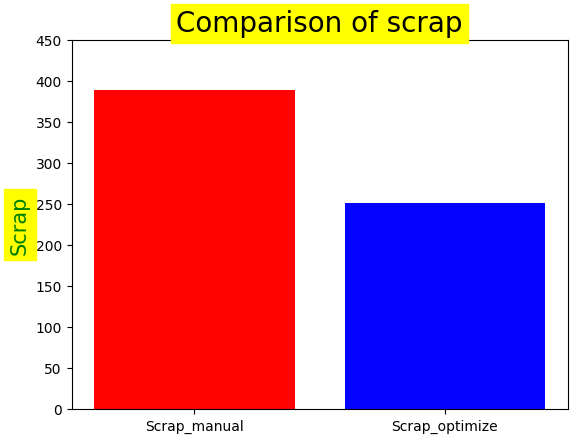

In [ ]:
#data
srap_manual =388
total_scrap #251

print(f'                   Reduct Scrap Metal: {abs(srap_manual-total_scrap )} mm. : { round(abs(srap_manual-total_scrap )/srap_manual,2) } %')
x = ['Scrap_manual' , 'Scrap_optimize']
y =  [srap_manual , total_scrap ]
plt.bar(x,y, color = ['red','blue'] , alpha = 0.99)
plt.title('Comparison of scrap' ,size =20 , color = 'black',backgroundcolor = 'yellow' )
plt.ylabel('Scrap',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.ylim(0, 450)
plt.show()


In [ ]:
result_piece
result_piece_values = []
for i in result_piece:
    result_piece_values.append( float(i.split(' ')[1]) )
print(result_piece_values)

[6.0, 7.0, 5.0, 3.0, 3.0]


In [ ]:
demand_work_values = list(demand_work.values())
demand_work_values

[6, 6.0, 4.0, 2.0, 3.0]

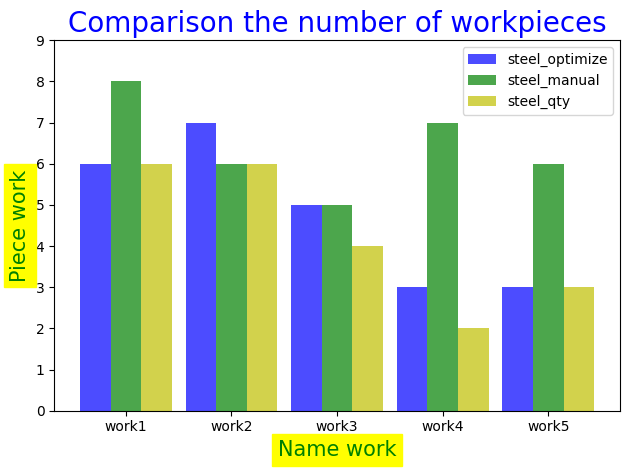

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot

steel_optimize = result_piece_values#[6.0, 7.0, 5.0, 3.0, 3.0]
stell_manual = [8,6,5,7,6]
steel_qty = demand_work_values #[6, 6.0, 4.0, 2.0, 3.0]

# create plot
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.29
opacity = 0.7

rects1 = plt.bar(index ,steel_optimize , bar_width,
alpha=opacity,
color='b',
label='steel_optimize')

rects2 = plt.bar(index + bar_width, stell_manual, bar_width,
alpha=opacity,
color='g',
label='steel_manual')


rects3 = plt.bar(index + 2*bar_width, steel_qty, bar_width,
alpha=opacity,
color='y',
label='steel_qty')



plt.xlabel('Name work',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.ylabel('Piece work',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.title('Comparison the number of workpieces' ,size =20 , color = 'blue' )
plt.xticks(index +bar_width, ['work1', 'work2', 'work3', 'work4' ,'work5'])
plt.legend()
plt.ylim(0,9)
plt.tight_layout()
plt.show()

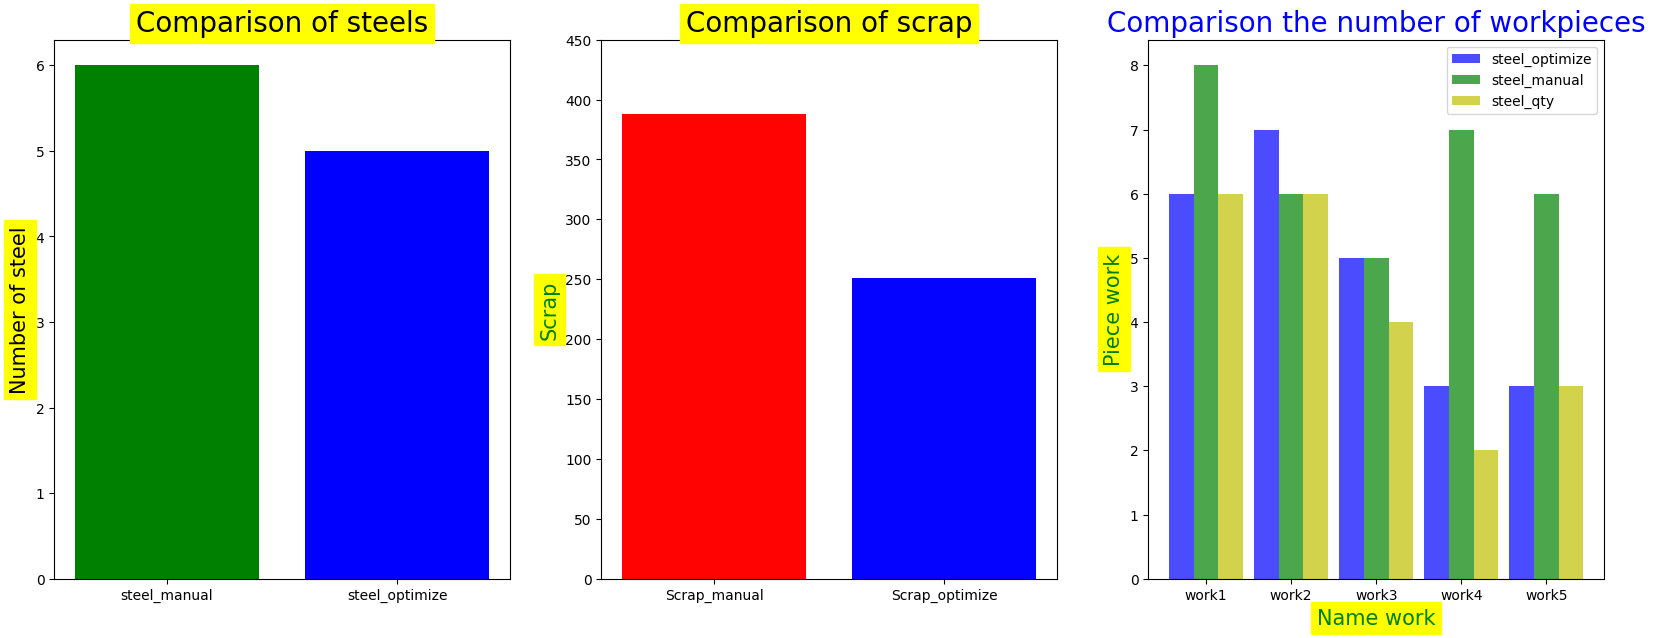

In [ ]:
import matplotlib.pyplot as plt
fig , axes = plt.subplots(1,3 , figsize =(20,7))

#data
steel_manual = 6
total_steel # 5

x = ['steel_manual' , 'steel_optimize']
y = [steel_manual , total_steel ]
axes[0].bar(x,y , color=  ['green','blue'])
axes[0].set_title('Comparison of steels' ,size =20 , color = 'black',backgroundcolor = 'yellow' )
axes[0].set_ylabel('Number of steel', size =15 , color = 'black', backgroundcolor = 'yellow')


#------------------------------------------------------------------------------------------------------------------


#data
srap_manual =388
total_scrap #251


x = ['Scrap_manual' , 'Scrap_optimize']
y =  [srap_manual , total_scrap ]
axes[1].bar(x,y, color = ['red','blue'] , alpha = 0.99)
axes[1].set_title('Comparison of scrap' ,size =20 , color = 'black',backgroundcolor = 'yellow' )
axes[1].set_ylabel('Scrap',size =15 ,color ="green" ,backgroundcolor = 'yellow')
axes[1].set_ylim(0, 450)



#------------------------------------------------------------------------------------------------------------------


steel_optimize = result_piece_values#[6.0, 7.0, 5.0, 3.0, 3.0]
stell_manual = [8,6,5,7,6]
steel_qty = demand_work_values #[6, 6.0, 4.0, 2.0, 3.0]

# create plot
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.29
opacity = 0.7

axes[2].bar(index ,steel_optimize , bar_width,
alpha=opacity,
color='b',
label='steel_optimize')

axes[2].bar(index + bar_width, stell_manual, bar_width,
alpha=opacity,
color='g',
label='steel_manual')


axes[2].bar(index + 2*bar_width, steel_qty, bar_width,
alpha=opacity,
color='y',
label='steel_qty')



axes[2].set_xlabel('Name work',size =15 ,color ="green" ,backgroundcolor = 'yellow')
axes[2].set_ylabel('Piece work',size =15 ,color ="green" ,backgroundcolor = 'yellow')
axes[2].set_title('Comparison the number of workpieces' ,size =20 , color = 'blue' )
axes[2].set_xticks(index +bar_width, ['work1', 'work2', 'work3', 'work4' ,'work5'])
axes[2].legend()



